
# Importing

In [1]:
# pandas,numpy,warning
import numpy as np
import pandas as pd
import warnings

# matplotlib, seaborn,counter
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# machine learning
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# model selection,sampling
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,train_test_split
from imblearn.under_sampling import RandomUnderSampler as RUS     
from imblearn.over_sampling import RandomOverSampler as ROS
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import roc_curve,auc

# Preprocessing,accuracy
from sklearn.preprocessing import scale

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("E:/kaggle_data/Census_Data/train.csv")
test_data=pd.read_csv("E:/kaggle_data/Census_Data/test.csv")

In [4]:
y=data['income_level']
y[y==50000]=1
y[y==(-50000)]=0
del data['income_level']

In [5]:
testyy=test_data['income_level']
testyy[testyy==' 50000+.']=1
testyy[testyy=='-50000']=0
del test_data['income_level']

In [6]:
for col in test_data.select_dtypes(['object']).columns:
    test_data[col]=test_data[col].str.strip()

In [7]:
full=pd.concat([data,test_data])
full.index=range(299285)

In [8]:
y.value_counts()

0    187141
1     12382
Name: income_level, dtype: int64

In [9]:
testyy.value_counts()

0    93576
1     6186
Name: income_level, dtype: int64

So this is Imbalanced data problem...minority has 6% population 

In [10]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299285 entries, 0 to 299284
Data columns (total 40 columns):
age                                 299285 non-null int64
class_of_worker                     299285 non-null object
industry_code                       299285 non-null int64
occupation_code                     299285 non-null int64
education                           299285 non-null object
wage_per_hour                       299285 non-null int64
enrolled_in_edu_inst_lastwk         299285 non-null object
marital_status                      299285 non-null object
major_industry_code                 299285 non-null object
major_occupation_code               299285 non-null object
race                                299285 non-null object
hispanic_origin                     298411 non-null object
sex                                 299285 non-null object
member_of_labor_union               299285 non-null object
reason_for_unemployment             299285 non-null object
full_par

In [11]:
data.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,family_members_under_18,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94


In [12]:
data.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


# Exploratory Data Analysis

In [13]:
# null value prediction

def null_predict(data):
    total=data.isnull().sum().sort_values(ascending=False)    
    percentage=((data.isnull().sum()*100)/data.isnull().count()).sort_values(ascending=False)
    missing=pd.concat([total,percentage],axis=1,keys=['Total','Percent'])
    return missing    
null_predict(data)

,Total,Percent
migration_msa,99696,49.967172
migration_sunbelt,99696,49.967172
migration_within_reg,99696,49.967172
migration_reg,99696,49.967172
country_father,6713,3.364524
country_mother,6119,3.066814
country_self,3393,1.700556
hispanic_origin,874,0.438045
state_of_previous_residence,708,0.354846
year,0,0.000000


# Visualisation

In [14]:
temp=pd.concat([data,y],axis=1)

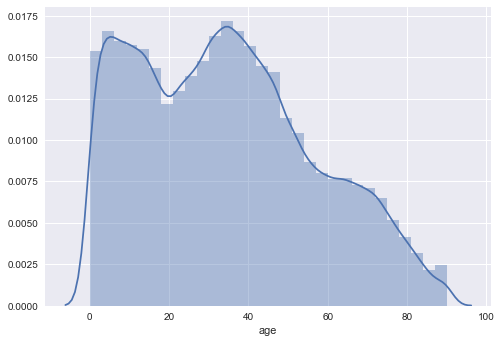

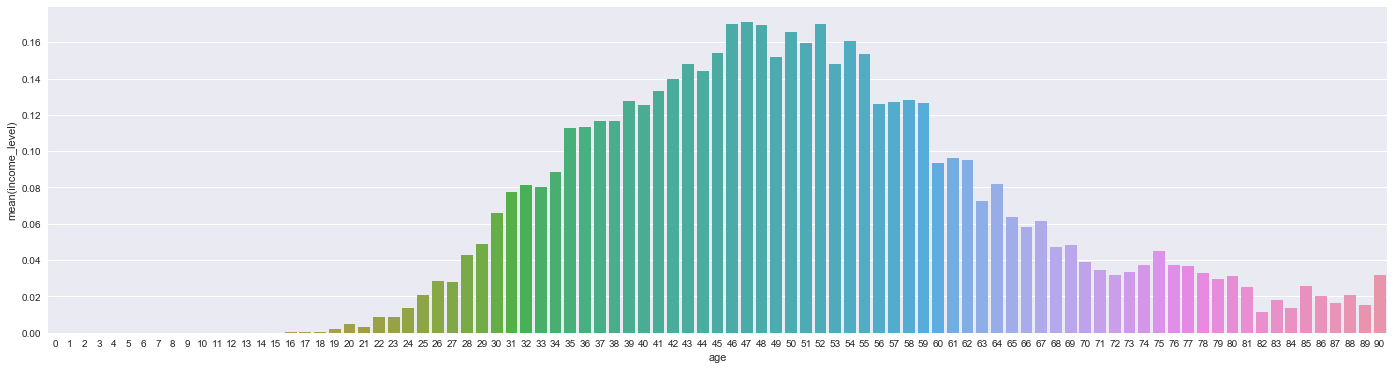

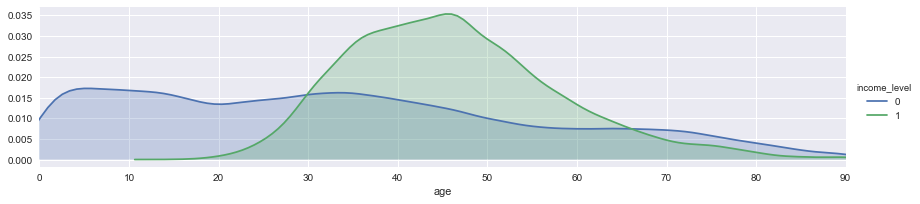

In [15]:
# Distribution plot
sns.distplot(data['age'],bins=30)
plt.show()

# Mean churn over Age 
plt.figure(figsize=(24,6))
average= temp[["age", "income_level"]].groupby(['age'],as_index=False).mean()
sns.barplot(x='age', y='income_level', data=average)
plt.show()

# KDE distribution over Age with income 0&1
facet = sns.FacetGrid(data=temp, hue="income_level",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['age'].max()))
plt.show()

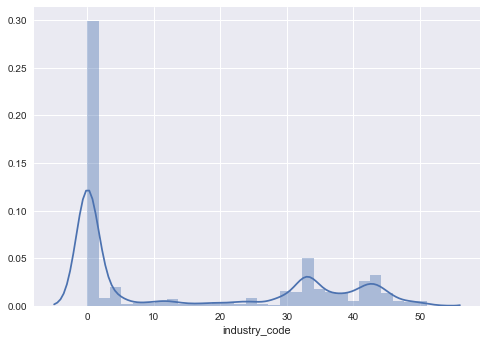

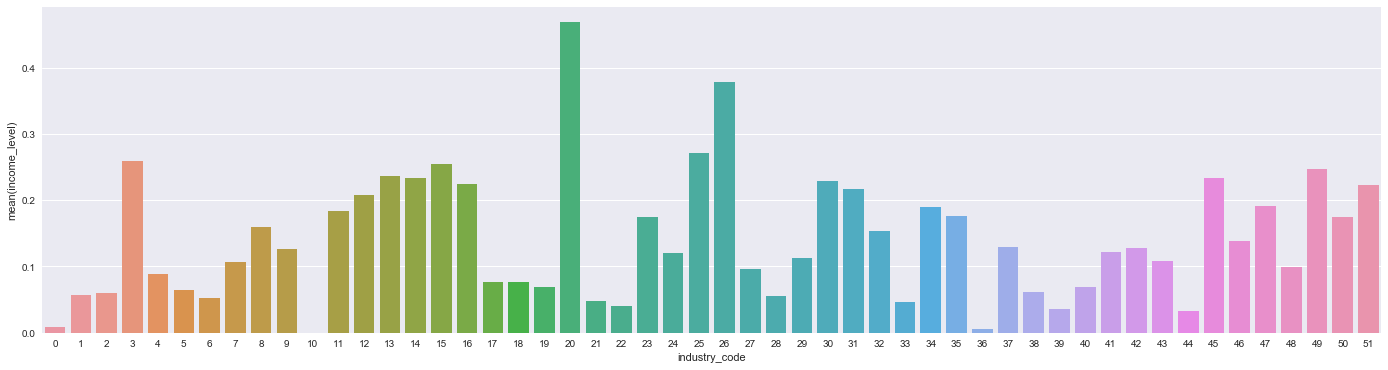

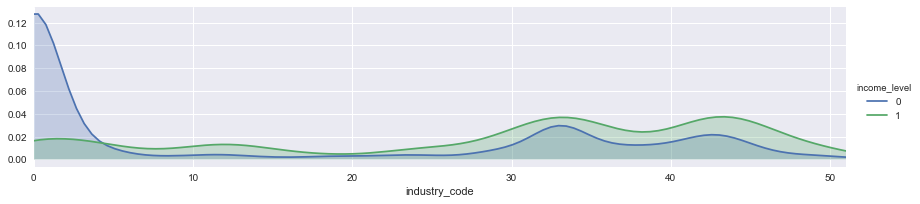

In [16]:
# Distribution plot
sns.distplot(data['industry_code'],bins=30)
plt.show()

# Mean churn over Industry Code 
plt.figure(figsize=(24,6))
average= temp[["industry_code", "income_level"]].groupby(['industry_code'],as_index=False).mean()
sns.barplot(x='industry_code', y='income_level', data=average)
plt.show()

# KDE distribution over Industry Code with income 0&1
facet = sns.FacetGrid(data=temp, hue="income_level",aspect=4)
facet.map(sns.kdeplot,'industry_code',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['industry_code'].max()))
plt.show()

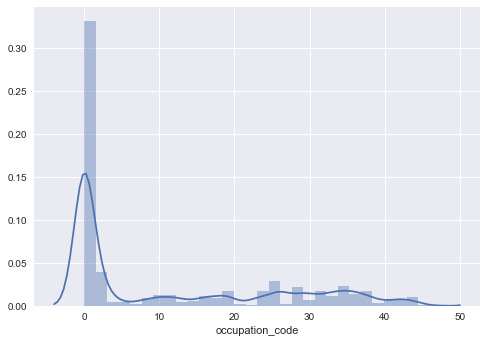

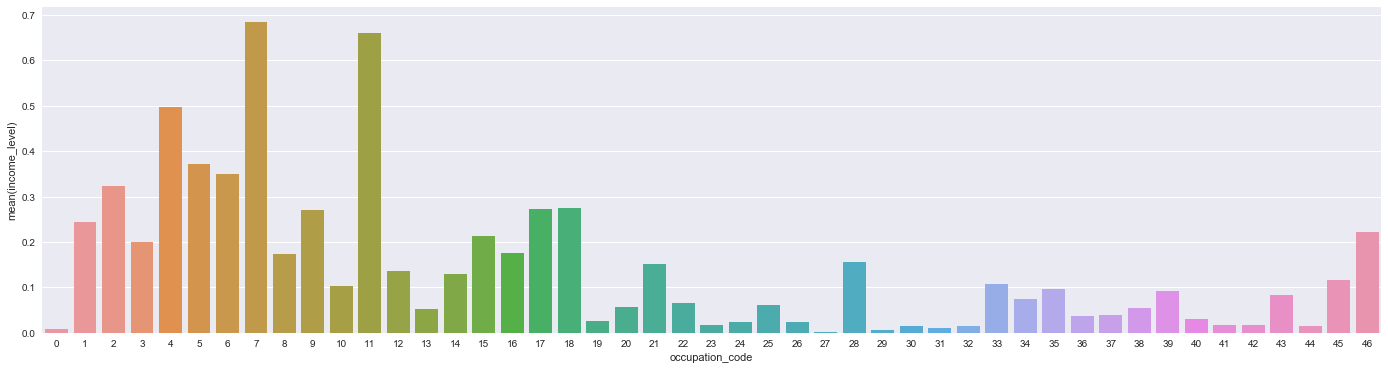

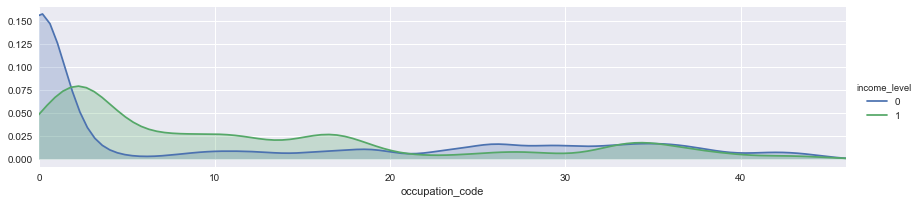

In [17]:
# Distribution plot
sns.distplot(data['occupation_code'],bins=30)
plt.show()

# Mean churn over Occupation Code 
plt.figure(figsize=(24,6))
average= temp[["occupation_code", "income_level"]].groupby(['occupation_code'],as_index=False).mean()
sns.barplot(x='occupation_code', y='income_level', data=average)
plt.show()

# KDE distribution over Occupation Code with income 0&1
facet = sns.FacetGrid(data=temp, hue="income_level",aspect=4)
facet.map(sns.kdeplot,'occupation_code',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['occupation_code'].max()))
plt.show()

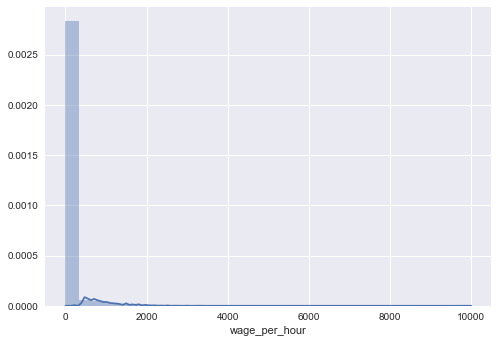

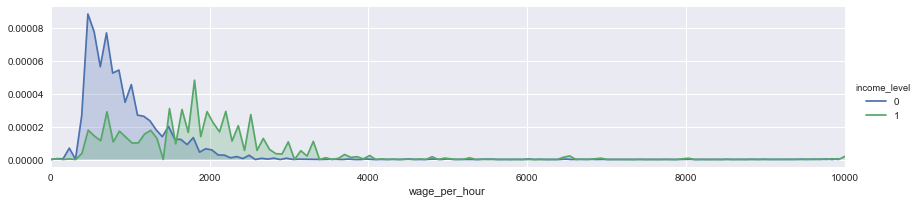

In [18]:
# Distribution plot
sns.distplot(data['wage_per_hour'],bins=30)
plt.show()

# KDE distribution over wage per hour with Churn 0&1
facet = sns.FacetGrid(data=temp, hue="income_level",aspect=4)
facet.map(sns.kdeplot,'wage_per_hour',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['wage_per_hour'].max()))
plt.show()

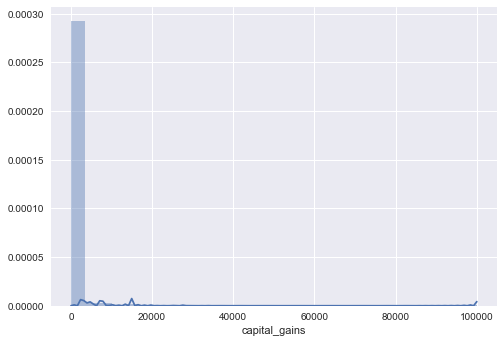

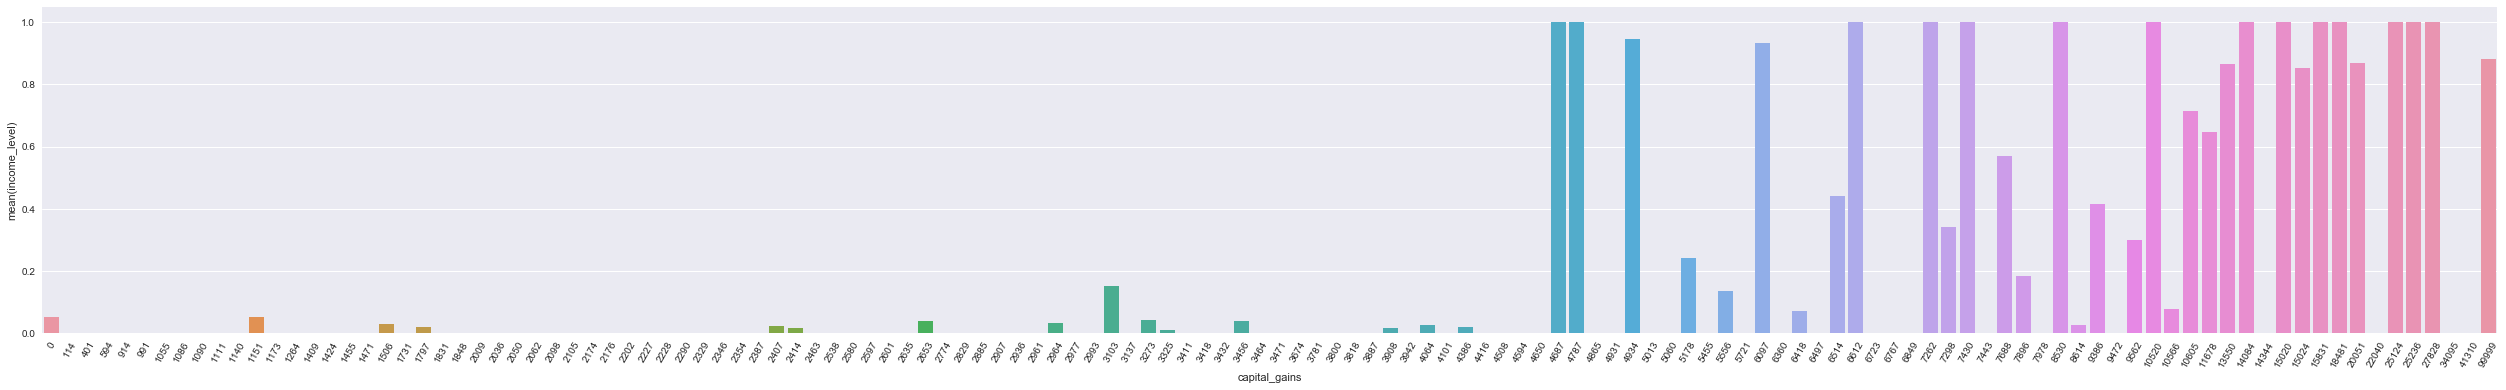

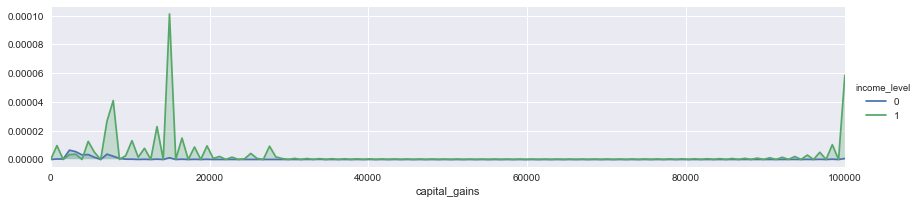

In [19]:
# Distribution plot
sns.distplot(data['capital_gains'],bins=30)
plt.show()

# Mean churn over Capital Gains
plt.figure(figsize=(44,6))
plt.xticks(rotation=60)
average= temp[["capital_gains", "income_level"]].groupby(['capital_gains'],as_index=False).mean()
sns.barplot(x='capital_gains', y='income_level', data=average)
plt.show()

# KDE distribution over Capital Gains with income 0&1
facet = sns.FacetGrid(data=temp, hue="income_level",aspect=4)
facet.map(sns.kdeplot,'capital_gains',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['capital_gains'].max()))
plt.show()

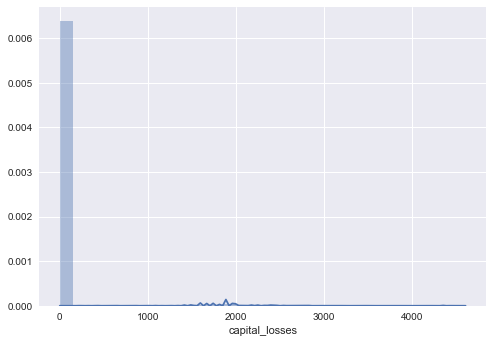

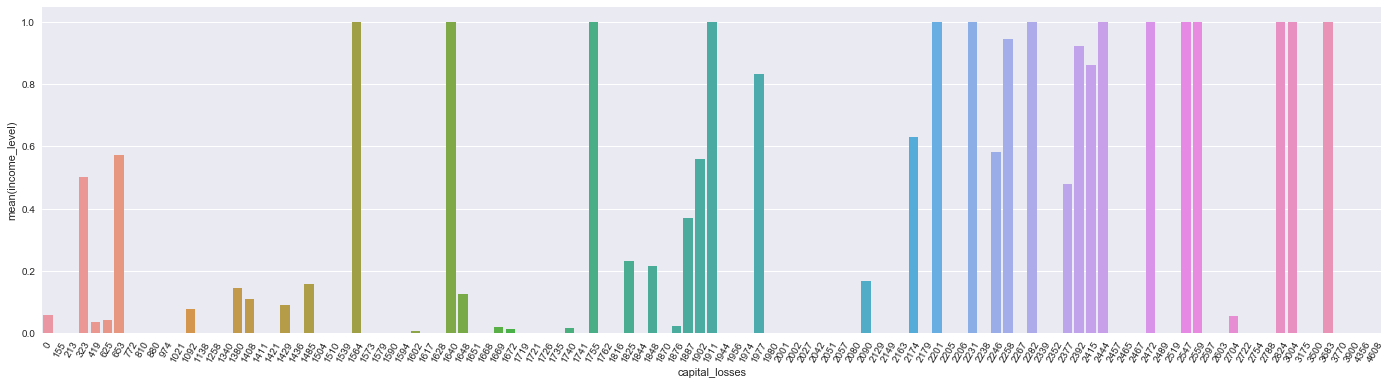

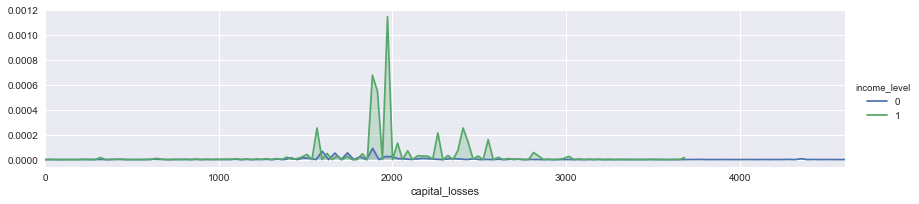

In [20]:
# Distribution plot
sns.distplot(data['capital_losses'],bins=30)
plt.show()

# Mean churn over Capital Losses
plt.figure(figsize=(24,6))
plt.xticks(rotation=60)
average= temp[["capital_losses", "income_level"]].groupby(['capital_losses'],as_index=False).mean()
sns.barplot(x='capital_losses', y='income_level', data=average)
plt.show()

# KDE distribution over Capital Losses with Churn 0&1
facet = sns.FacetGrid(data=temp, hue="income_level",aspect=4)
facet.map(sns.kdeplot,'capital_losses',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['capital_losses'].max()))
plt.show()

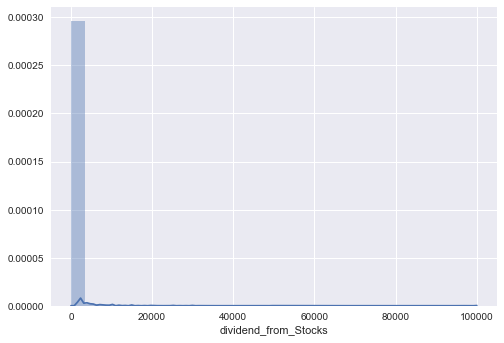

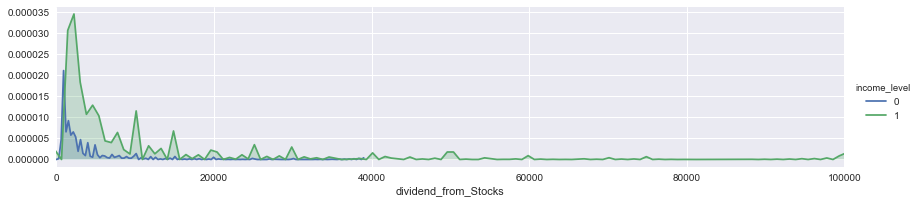

In [21]:
# Distribution plot
sns.distplot(data['dividend_from_Stocks'],bins=30)
plt.show()

# KDE distribution over Dividend from Stocks with Churn 0&1
facet = sns.FacetGrid(data=temp, hue="income_level",aspect=4)
facet.map(sns.kdeplot,'dividend_from_Stocks',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['dividend_from_Stocks'].max()))
plt.show()

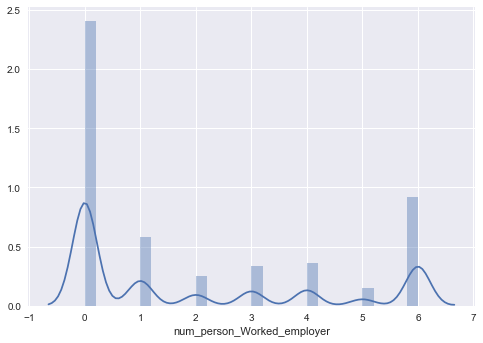

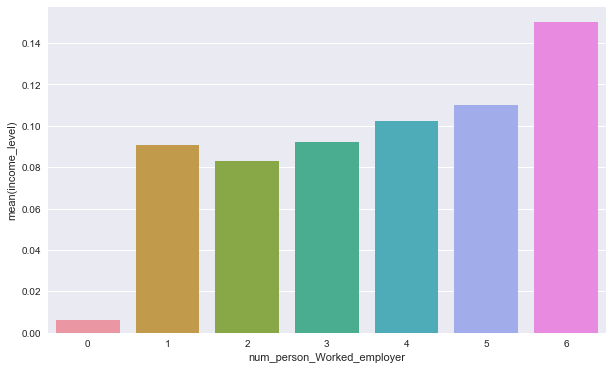

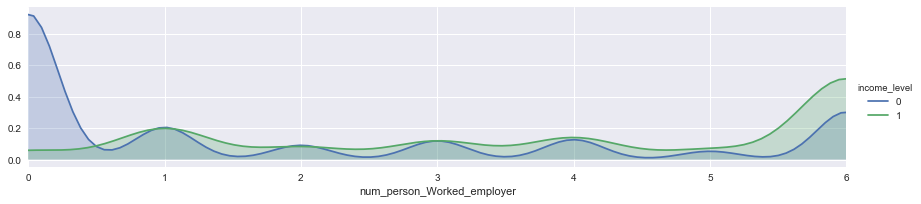

In [22]:
# Distribution plot
sns.distplot(data['num_person_Worked_employer'],bins=30)
plt.show()

# Mean churn over no of working employee
plt.figure(figsize=(10,6))
average= temp[["num_person_Worked_employer", "income_level"]].groupby(['num_person_Worked_employer'],as_index=False).mean()
sns.barplot(x='num_person_Worked_employer', y='income_level', data=average)
plt.show()

# KDE distribution over no of working employee with income 0&1
facet = sns.FacetGrid(data=temp, hue="income_level",aspect=4)
facet.map(sns.kdeplot,'num_person_Worked_employer',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['num_person_Worked_employer'].max()))
plt.show()

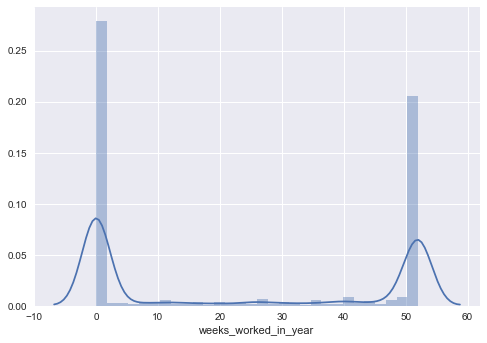

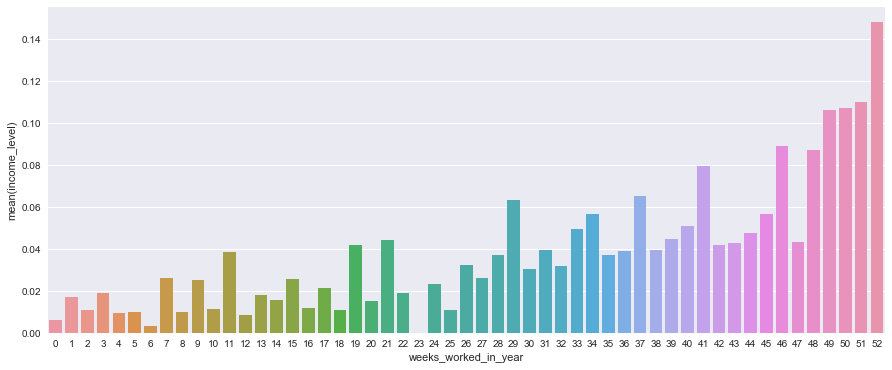

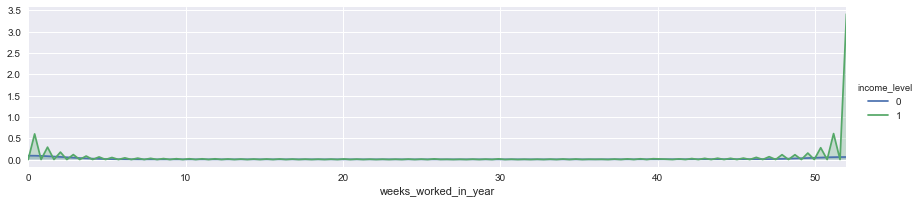

In [23]:
# Distribution plot
sns.distplot(data['weeks_worked_in_year'],bins=30)
plt.show()

# Mean churn over Working weeks 
plt.figure(figsize=(15,6))
average= temp[["weeks_worked_in_year", "income_level"]].groupby(['weeks_worked_in_year'],as_index=False).mean()
sns.barplot(x='weeks_worked_in_year', y='income_level', data=average)
plt.show()

# KDE distribution over Working weeks with income 0&1
facet = sns.FacetGrid(data=temp, hue="income_level",aspect=4)
facet.map(sns.kdeplot,'weeks_worked_in_year',shade= True)
facet.add_legend()
facet.set(xlim=(0, data['weeks_worked_in_year'].max()))
plt.show()

# Categorical Features 

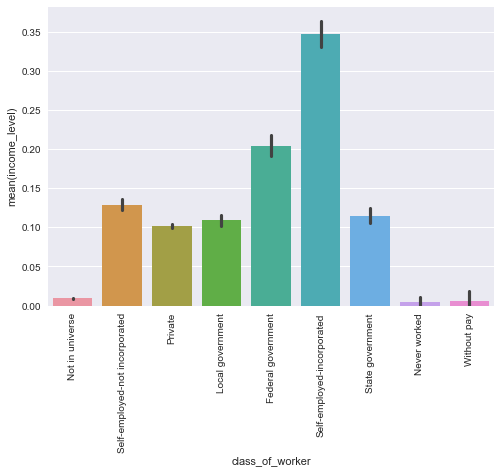

In [24]:
plt.xticks(rotation=90)
sns.barplot(x='class_of_worker',y='income_level',data=temp)
plt.show()

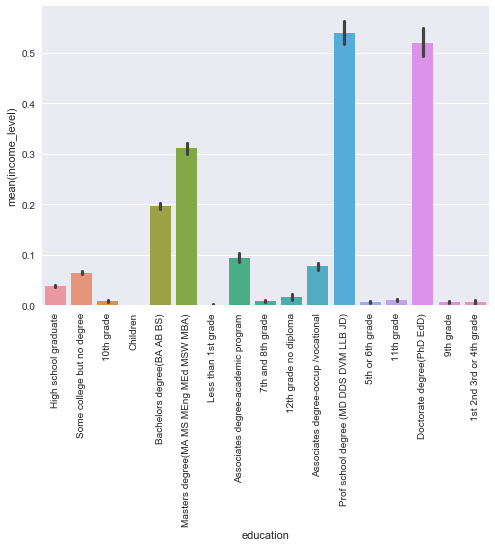

In [25]:
plt.xticks(rotation=90)
sns.barplot(x='education',y='income_level',data=temp)
plt.show()

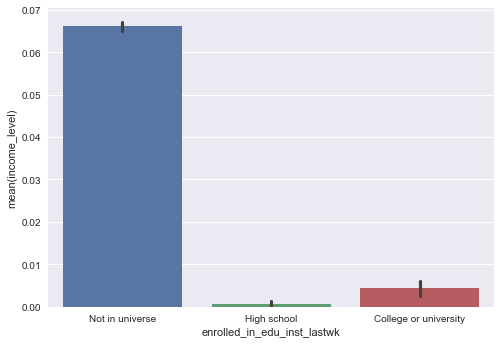

In [26]:
sns.barplot(x='enrolled_in_edu_inst_lastwk',y='income_level',data=temp)
plt.show()

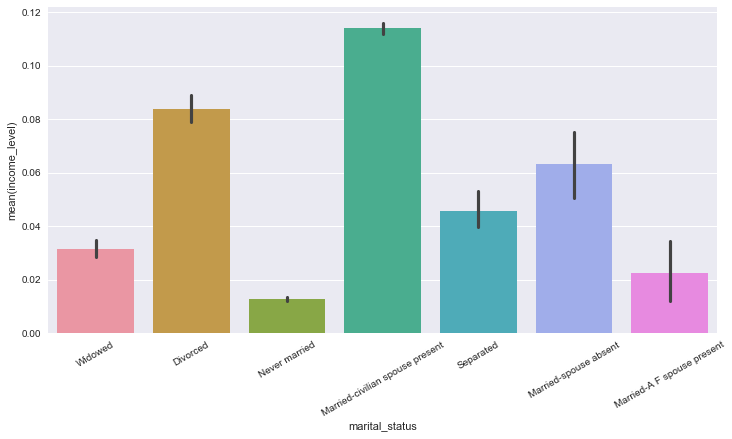

In [27]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=30)
sns.barplot(x='marital_status',y='income_level',data=temp)
plt.show()

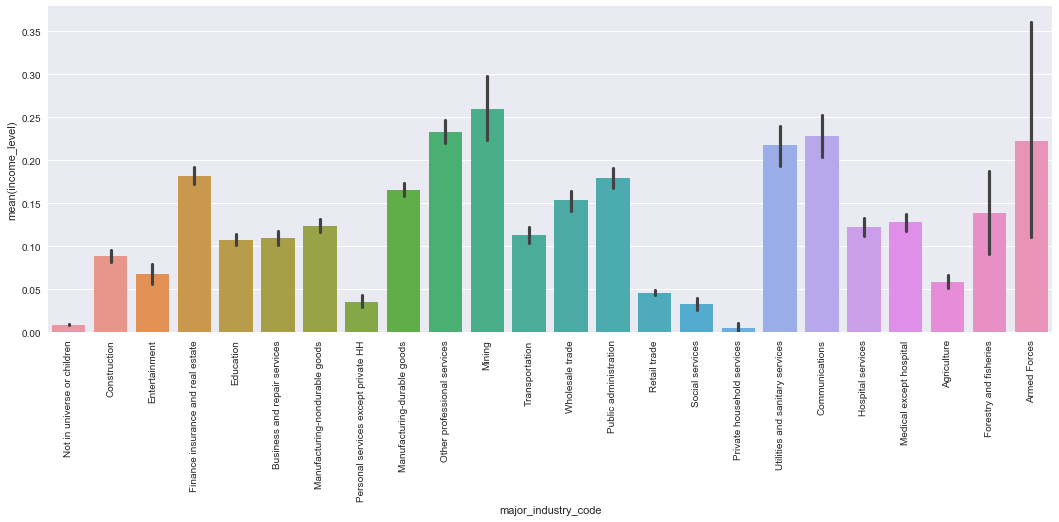

In [28]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
sns.barplot(x='major_industry_code',y='income_level',data=temp)
plt.show()

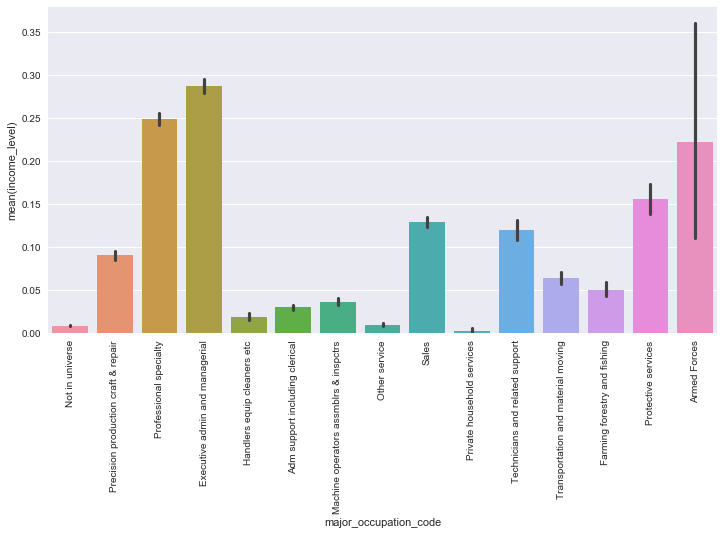

In [29]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(x='major_occupation_code',y='income_level',data=temp)
plt.show()

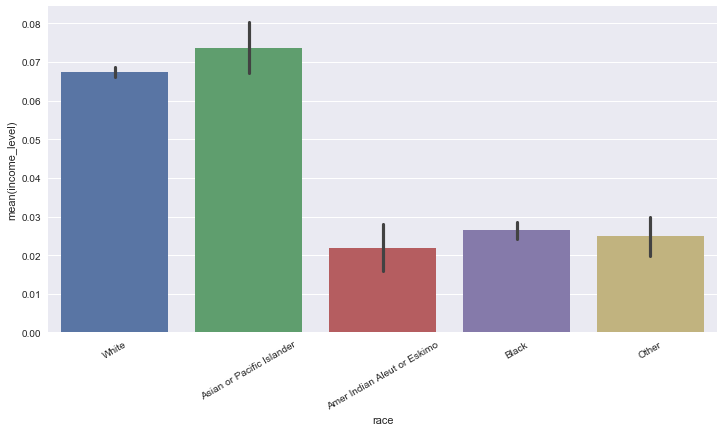

In [30]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=30)
sns.barplot(x='race',y='income_level',data=temp)
plt.show()

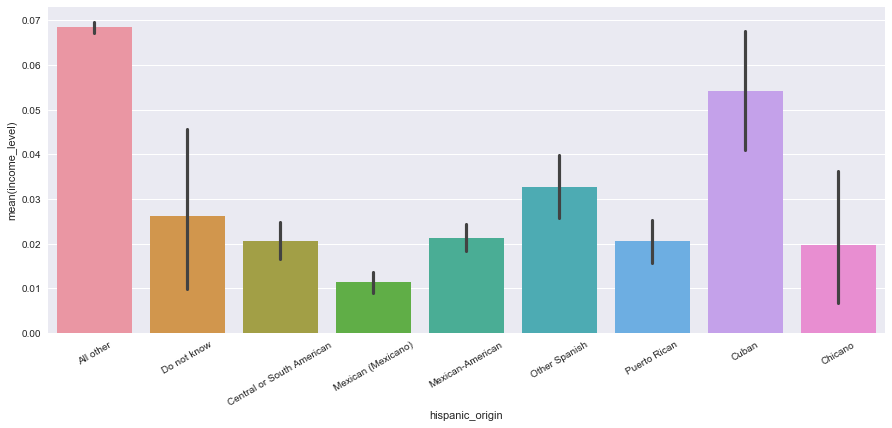

In [31]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=30)
sns.barplot(x='hispanic_origin',y='income_level',data=temp)
plt.show()

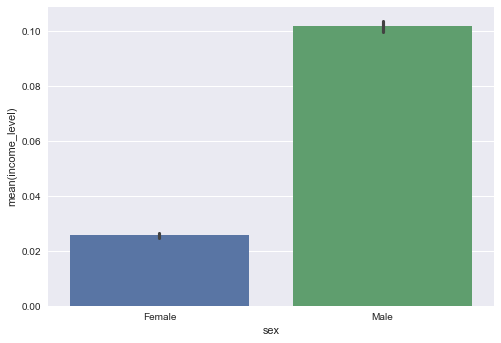

In [32]:
sns.barplot(x='sex',y='income_level',data=temp)
plt.show()

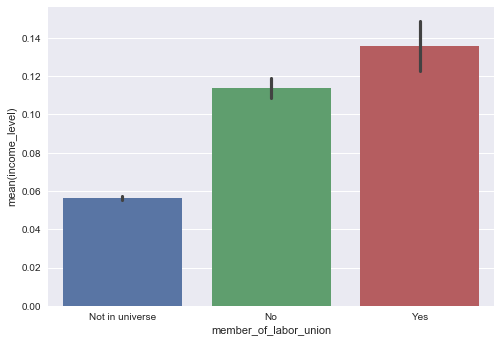

In [33]:
sns.barplot(x='member_of_labor_union',y='income_level',data=temp)
plt.show()

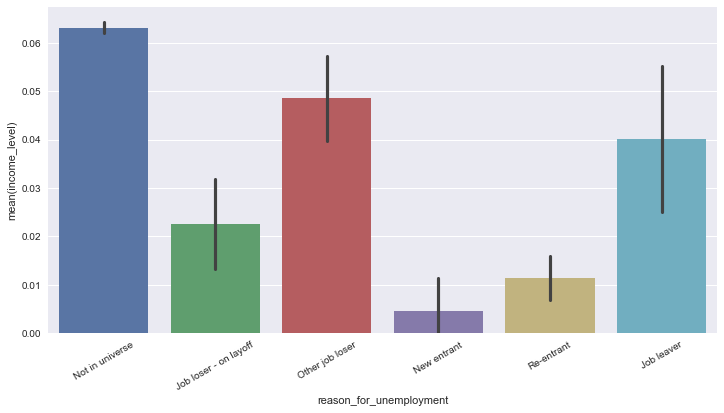

In [34]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=30)
sns.barplot(x='reason_for_unemployment',y='income_level',data=temp)
plt.show()

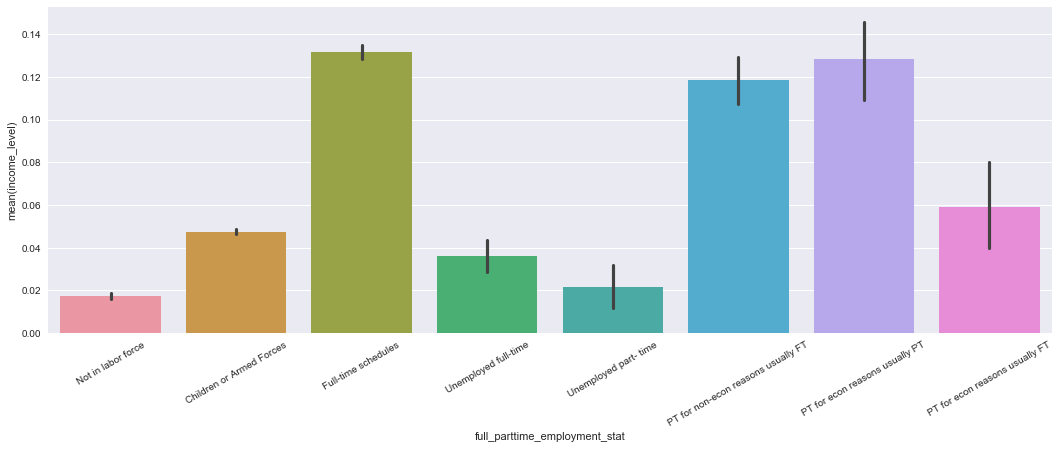

In [35]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=30)
sns.barplot(x='full_parttime_employment_stat',y='income_level',data=temp)
plt.show()

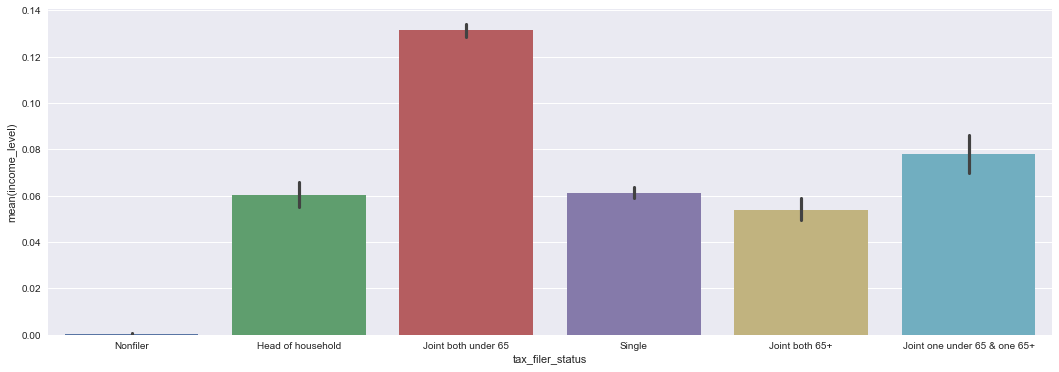

In [36]:
plt.figure(figsize=(18,6))
sns.barplot(x='tax_filer_status',y='income_level',data=temp)
plt.show()

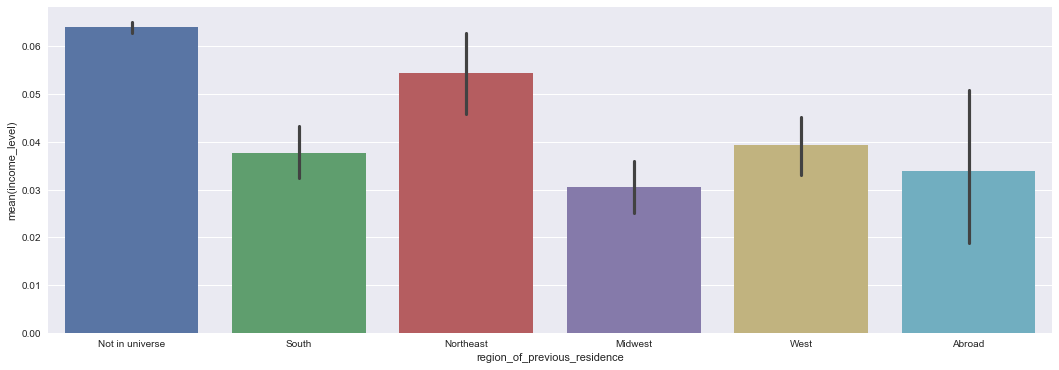

In [37]:
plt.figure(figsize=(18,6))
sns.barplot(x='region_of_previous_residence',y='income_level',data=temp)
plt.show()

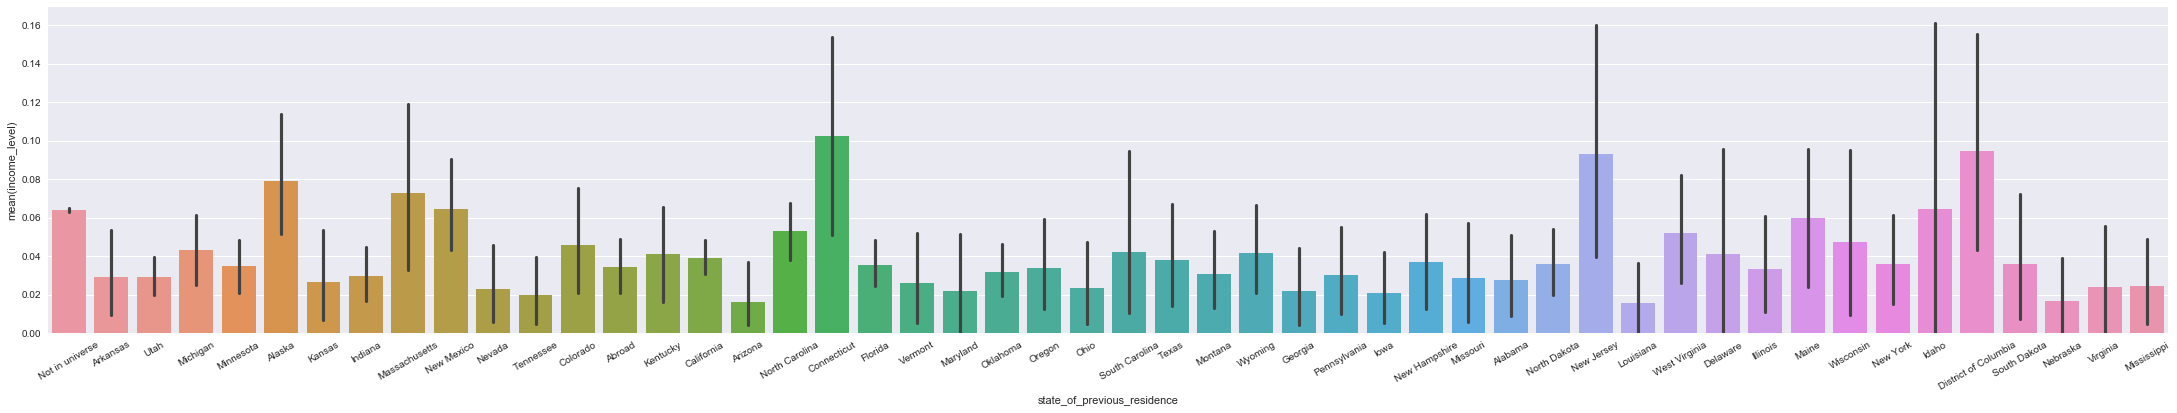

In [38]:
plt.figure(figsize=(38,6))
plt.xticks(rotation=30)
sns.barplot(x='state_of_previous_residence',y='income_level',data=temp)
plt.show()

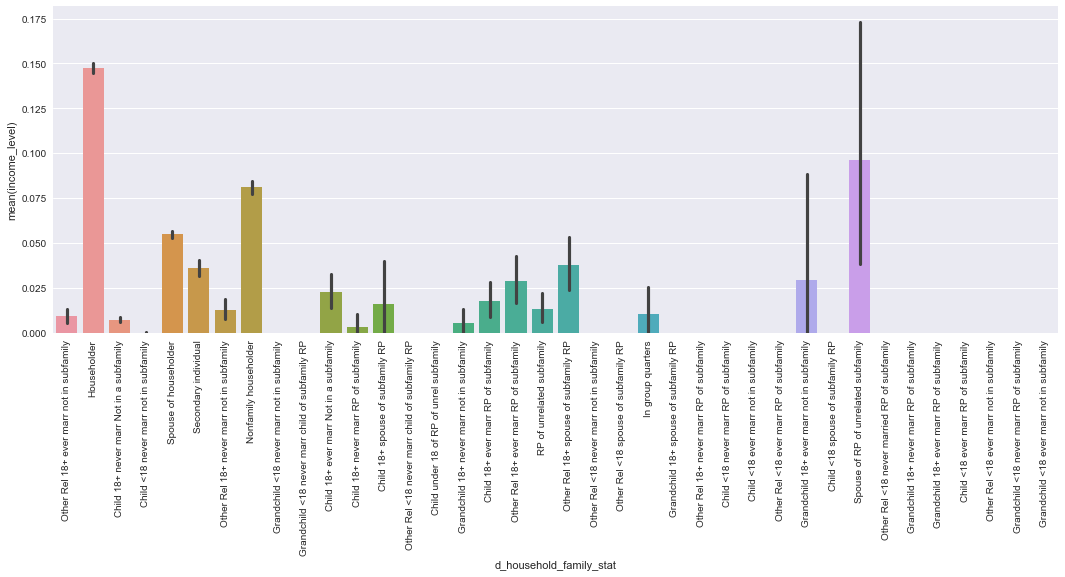

In [39]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
sns.barplot(x='d_household_family_stat',y='income_level',data=temp)
plt.show()

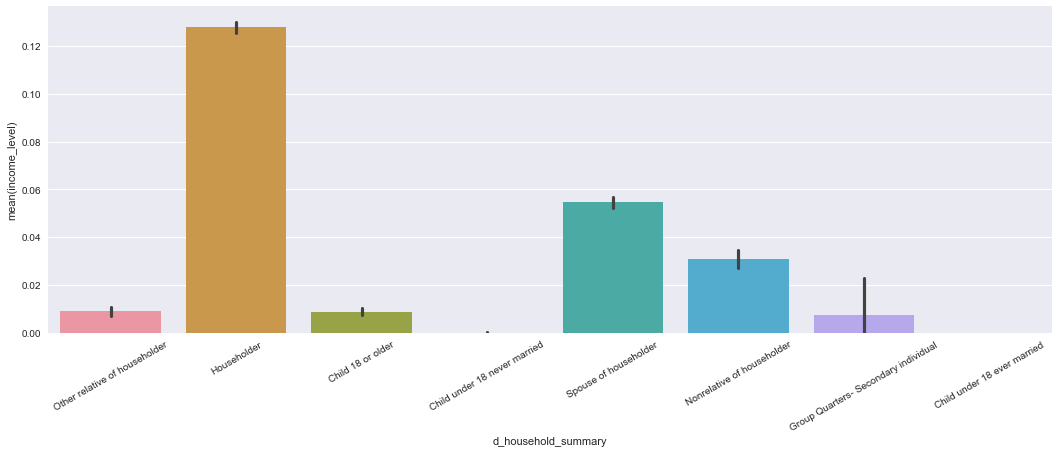

In [40]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=30)
sns.barplot(x='d_household_summary',y='income_level',data=temp)
plt.show()

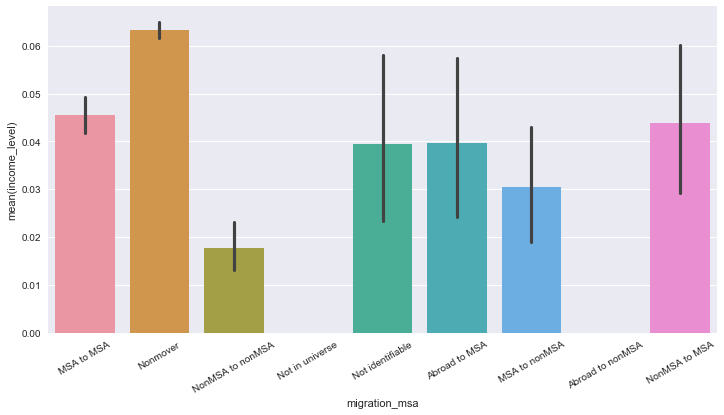

In [41]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=30)
sns.barplot(x='migration_msa',y='income_level',data=temp)
plt.show()

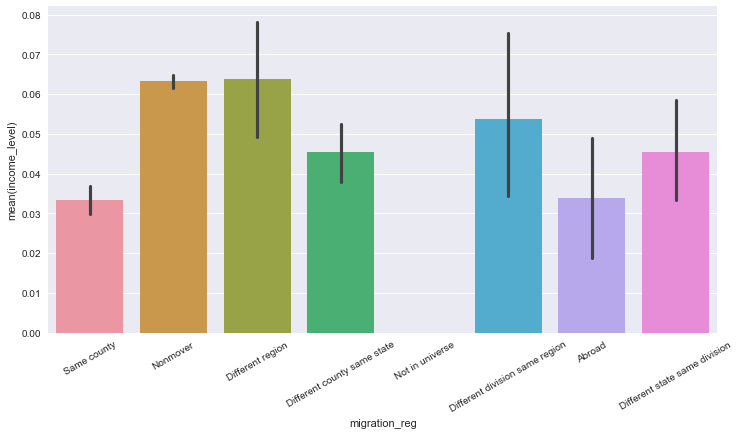

In [42]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=30)
sns.barplot(x='migration_reg',y='income_level',data=temp)
plt.show()

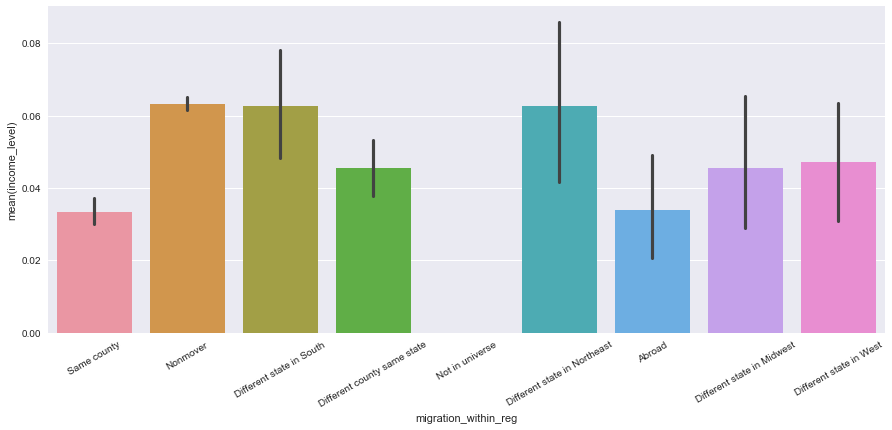

In [43]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=30)
sns.barplot(x='migration_within_reg',y='income_level',data=temp)
plt.show()

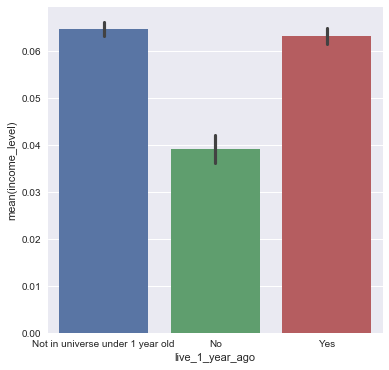

In [44]:
plt.figure(figsize=(6,6))
sns.barplot(x='live_1_year_ago',y='income_level',data=temp)
plt.show()

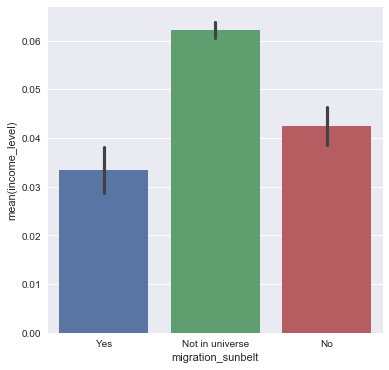

In [45]:
plt.figure(figsize=(6,6))
sns.barplot(x='migration_sunbelt',y='income_level',data=temp)
plt.show()

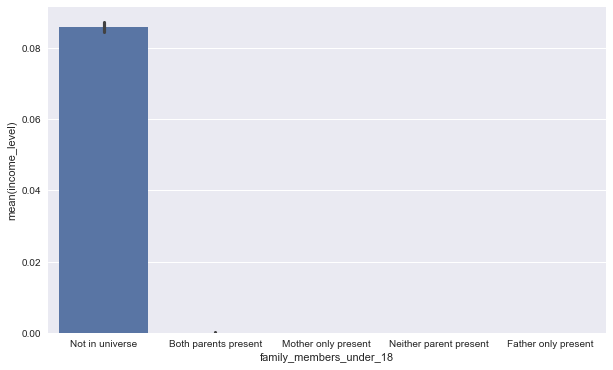

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x='family_members_under_18',y='income_level',data=temp)
plt.show()

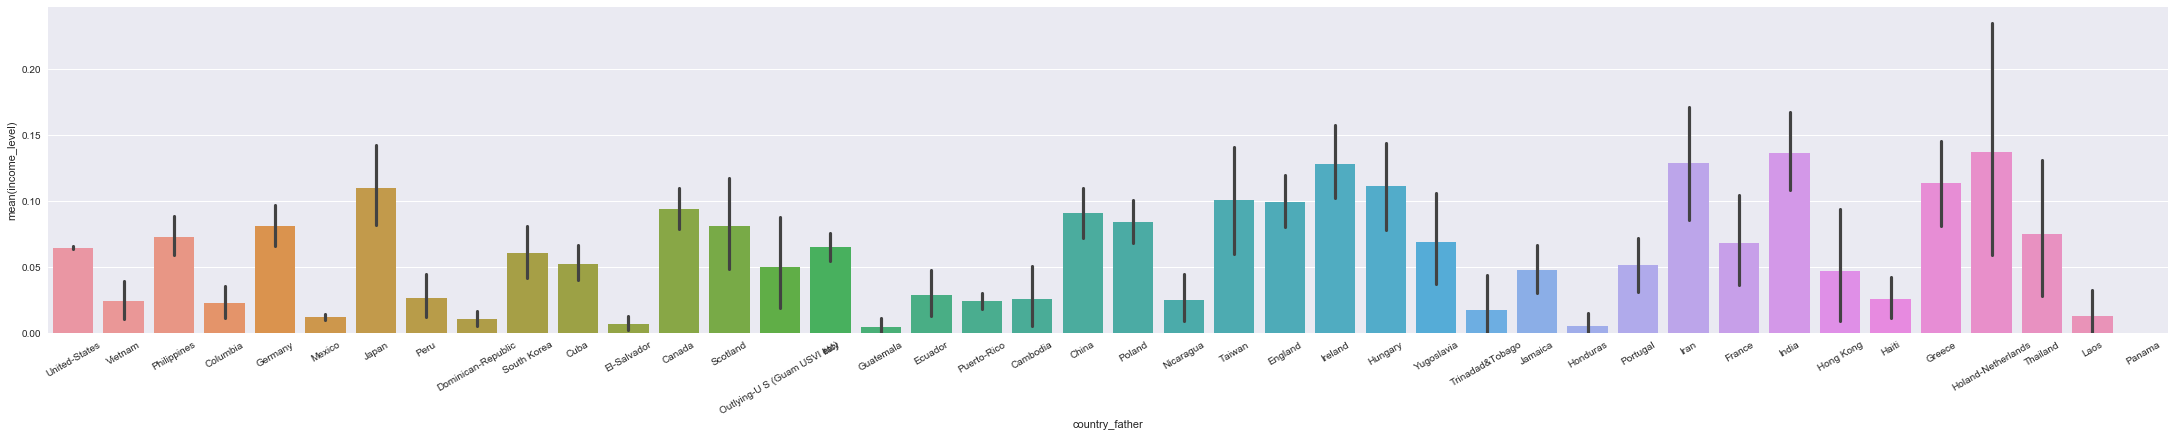

In [47]:
plt.figure(figsize=(38,6))
plt.xticks(rotation=30)
sns.barplot(x='country_father',y='income_level',data=temp)
plt.show()

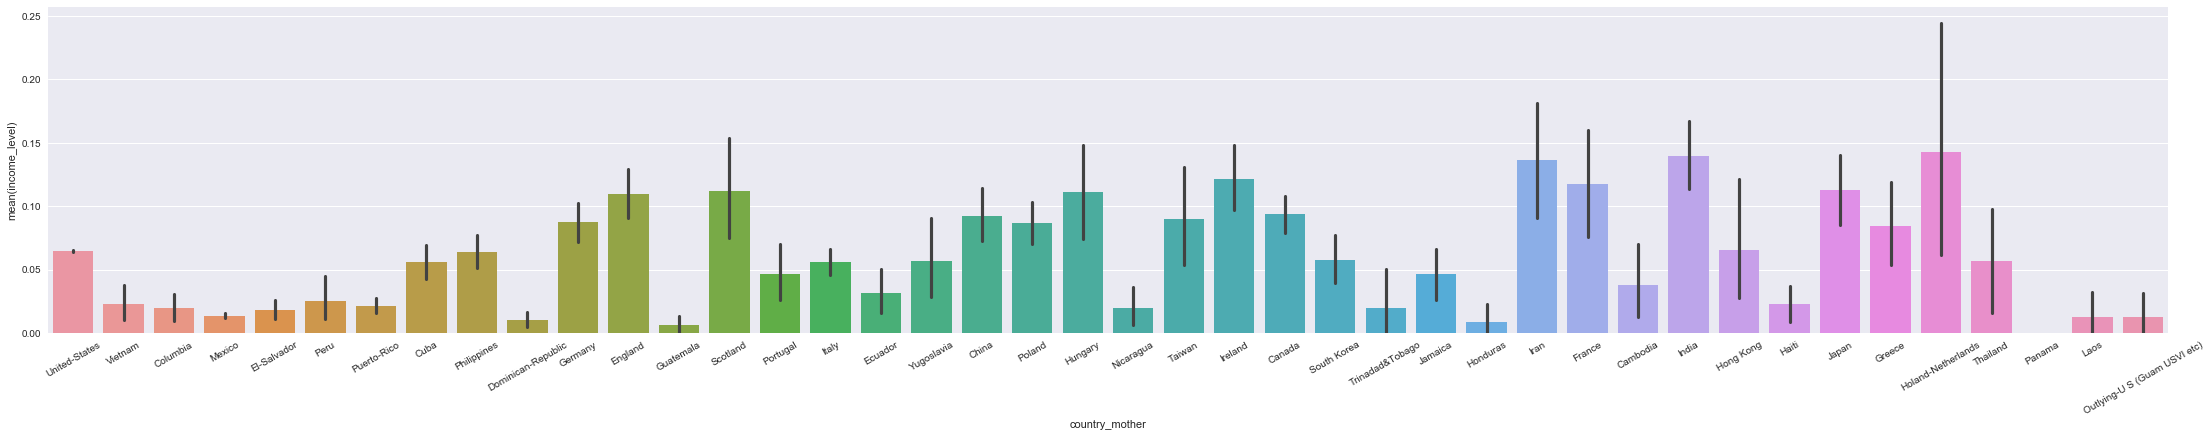

In [48]:
plt.figure(figsize=(38,6))
plt.xticks(rotation=30)
sns.barplot(x='country_mother',y='income_level',data=temp)
plt.show()

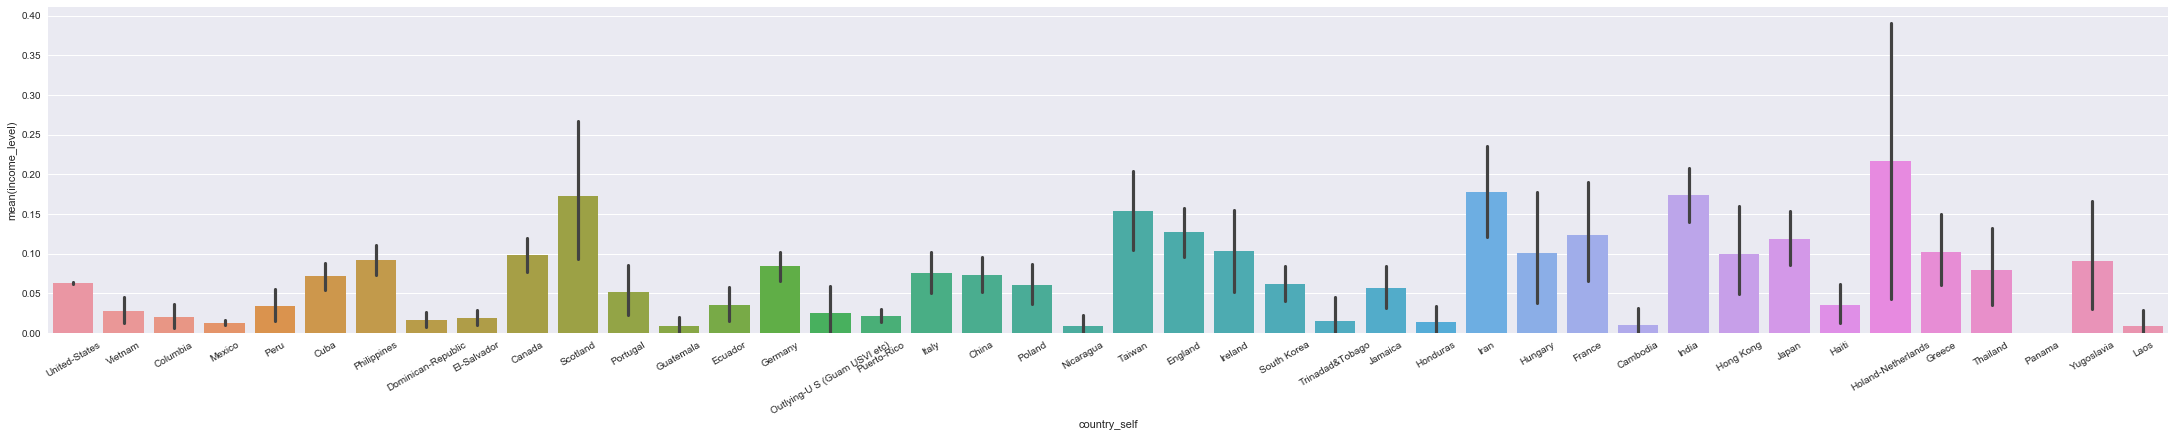

In [49]:
plt.figure(figsize=(38,6))
plt.xticks(rotation=30)
sns.barplot(x='country_self',y='income_level',data=temp)
plt.show()

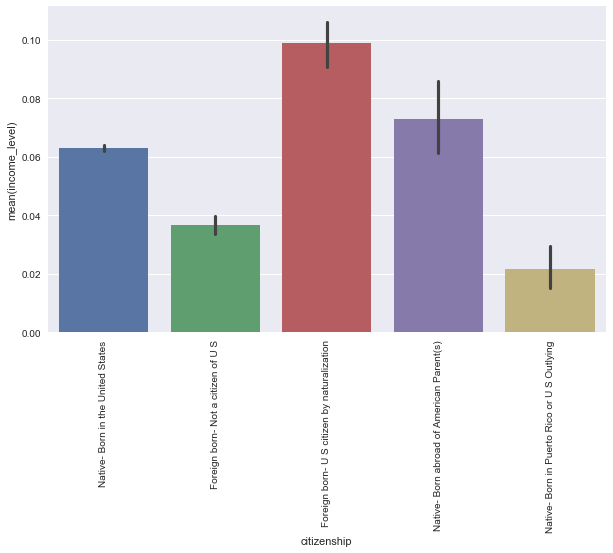

In [50]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(x='citizenship',y='income_level',data=temp)
plt.show()

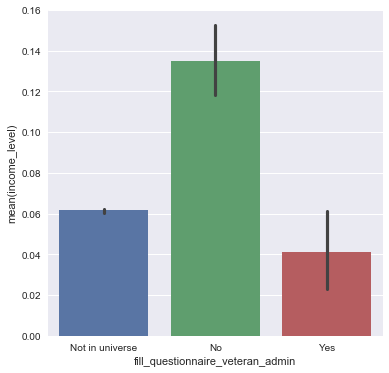

In [51]:
plt.figure(figsize=(6,6))
sns.barplot(x='fill_questionnaire_veteran_admin',y='income_level',data=temp)
plt.show()

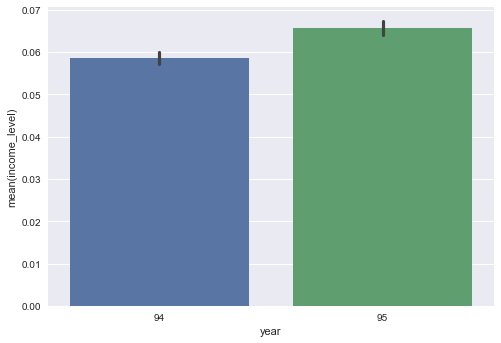

In [52]:
sns.barplot(x='year',y='income_level',data=temp)
plt.show()

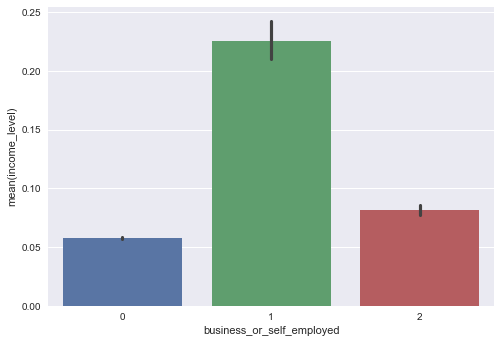

In [53]:
sns.barplot(x='business_or_self_employed', y='income_level', data=temp)
plt.show()

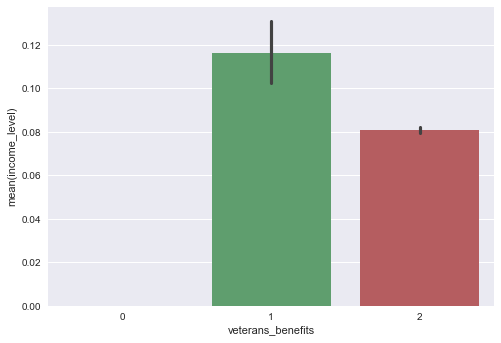

In [54]:
sns.barplot(x='veterans_benefits',y='income_level',data=temp)
plt.show()

# Feature Manipulation 

In [55]:
data.education.value_counts(dropna=False)

High school graduate                      48407
Children                                  47422
Some college but no degree                27820
Bachelors degree(BA AB BS)                19865
7th and 8th grade                          8007
10th grade                                 7557
11th grade                                 6876
Masters degree(MA MS MEng MEd MSW MBA)     6541
9th grade                                  6230
Associates degree-occup /vocational        5358
Associates degree-academic program         4363
5th or 6th grade                           3277
12th grade no diploma                      2126
1st 2nd 3rd or 4th grade                   1799
Prof school degree (MD DDS DVM LLB JD)     1793
Doctorate degree(PhD EdD)                  1263
Less than 1st grade                         819
Name: education, dtype: int64

In [56]:
full.loc[full.education.isin(['Children','9th grade','7th and 8th grade','10th grade','11th grade','5th or 6th grade','12th grade no diploma','1st 2nd 3rd or 4th grade','High school graduate','Some college but no degree','Less than 1st grade']),'edu']='low'
full.loc[full.education.isin(['Bachelors degree(BA AB BS)','Masters degree(MA MS MEng MEd MSW MBA)','Associates degree-occup /vocational','Associates degree-academic program']),'edu']='medium'
full.loc[full.education.isin(['Prof school degree (MD DDS DVM LLB JD)','Doctorate degree(PhD EdD)']),'edu']='high'

In [57]:
full.edu.value_counts(dropna=False)

low       240646
medium     54087
high        4552
Name: edu, dtype: int64

In [58]:
full['worker_class']=full['class_of_worker']
full.loc[full.class_of_worker.isin(['Self-employed-not incorporated','Self-employed-incorporated']),'worker_class']='Self-employed'
full.loc[full.class_of_worker.isin(['Local government','State government','Federal government']),'worker_class']='Govt-employed'
full.loc[full.class_of_worker.isin(['Never worked','Without pay']),'worker_class']='Others'

In [59]:
full.marital_status.value_counts(dropna=False)

Never married                      129628
Married-civilian spouse present    126315
Divorced                            19160
Widowed                             15788
Separated                            5156
Married-spouse absent                2234
Married-A F spouse present           1004
Name: marital_status, dtype: int64

In [60]:
full['married']=full['marital_status']
full.loc[full.marital_status.isin(['Divorced','Widowed']),'married']='Separated'
full.loc[full.marital_status.isin(['Married-civilian spouse present','Married-spouse absent','Married-A F spouse present']),'married']='married'

In [61]:
full.loc[full.hispanic_origin=='Do not know','hispanic_origin']=np.nan

In [62]:
full.hispanic_origin.value_counts(dropna=False)

All other                    257830
Mexican-American              12080
Mexican (Mexicano)            10929
Central or South American      5882
Puerto Rican                   4895
Other Spanish                  3728
Cuban                          1742
NaN                            1320
Chicano                         474
NA                              405
Name: hispanic_origin, dtype: int64

In [63]:
full.loc[full.hispanic_origin=='Other Spanish','hispanic_origin']='Central or South American'

In [64]:
full.loc[full.region_of_previous_residence.isin(['Abroad']),'region_of_previous_residence']='Not in universe'

In [65]:
full.loc[:,'Age']=0
full.loc[(full.age>29)&(full.age<=67),'Age']=1

In [66]:
full.loc[full.industry_code<5,'Industry_code']=0
full.loc[(full.industry_code>=5)&(full.industry_code<=30),'Industry_code']=1
full.loc[full.industry_code>30,'Industry_code']=2

In [67]:
full.loc[:,'Occupation_code']=0
full.loc[(full.occupation_code>3)&(full.occupation_code<20),'Occupation_code']=1

In [68]:
full.loc[full.wage_per_hour<=1500,'wage/hr']=0
full.loc[(full.wage_per_hour>1500)&(full.wage_per_hour<=4000),'wage/hr']=1
full.loc[full.wage_per_hour>4000,'wage/hr']=2

In [69]:
full.loc[full.capital_gains<=4660,'capital_gain']=0
full.loc[(full.capital_gains>4660)&(full.capital_gains<=27000),'capital_gain']=1
full.loc[full.capital_gains>27000,'capital_gain']=2

In [70]:
full.loc[:,'capital_loss']=0
full.loc[(full.capital_losses>=1400)&(full.capital_losses<=2560),'capital_loss']=1

In [71]:
full.loc[full.dividend_from_Stocks<=3000,'stk_dividend']=0
full.loc[(full.dividend_from_Stocks>3000)&(full.dividend_from_Stocks<=16000),'stk_dividend']=1
full.loc[full.dividend_from_Stocks>16000,'stk_dividend']=2

# Imputation

In [72]:
full['wage/hr'].value_counts(dropna=False)

0.0    296968
1.0      2233
2.0        84
Name: wage/hr, dtype: int64

In [73]:
a=full['wage/hr'].value_counts()
b=a[a<100].index
c=a[a>100].index
full.loc[full['wage/hr'].isin(b),'wage/hr']=np.random.choice(c)

In [74]:
full['wage/hr'].value_counts(dropna=False)

0.0    296968
1.0      2317
Name: wage/hr, dtype: int64

In [75]:
full['capital_gain'].value_counts(dropna=False)

0.0    293133
1.0      5418
2.0       734
Name: capital_gain, dtype: int64

In [76]:
a=full['capital_gain'].value_counts()
b=a[a<800].index
c=a[a>800].index
full.loc[full['capital_gain'].isin(b),'capital_gain']=np.random.choice(c)

In [77]:
full['capital_gain'].value_counts(dropna=False)

0.0    293867
1.0      5418
Name: capital_gain, dtype: int64

In [78]:
full['stk_dividend'].value_counts(dropna=False)

0.0    295249
1.0      3475
2.0       561
Name: stk_dividend, dtype: int64

In [79]:
a=full['stk_dividend'].value_counts()
b=a[a<600].index
c=a[a>600].index
full.loc[full['stk_dividend'].isin(b),'stk_dividend']=np.random.choice(c)

In [80]:
full['stk_dividend'].value_counts(dropna=False)

0.0    295810
1.0      3475
Name: stk_dividend, dtype: int64

In [81]:
# Replace '?' & 'NA' with NaN

full.loc[full['migration_msa']=='?','migration_msa']=np.nan
full.loc[full['migration_sunbelt']=='?','migration_sunbelt']=np.nan
full.loc[full['migration_within_reg']=='?','migration_within_reg']=np.nan
full.loc[full['migration_reg']=='?','migration_reg']=np.nan
full.loc[full['country_father']=='?','country_father']=np.nan
full.loc[full['country_mother']=='?','country_mother']=np.nan
full.loc[full['country_self']=='?','country_self']=np.nan
full.loc[full['state_of_previous_residence']=='?','state_of_previous_residence']=np.nan
full.loc[full['hispanic_origin']=='NA','hispanic_origin']=np.nan


In [82]:
# Fill NaN values randomly

full.loc[full['migration_msa'].isnull(),'migration_msa']=np.random.choice(full.migration_msa.value_counts().index,full.migration_msa.isnull().sum())        
full.loc[full['migration_sunbelt'].isnull(),'migration_sunbelt']=np.random.choice(full.migration_sunbelt.value_counts().index,full.migration_sunbelt.isnull().sum())        
full.loc[full['migration_within_reg'].isnull(),'migration_within_reg']=np.random.choice(full.migration_within_reg.value_counts().index,full.migration_within_reg.isnull().sum())        
full.loc[full['migration_reg'].isnull(),'migration_reg']=np.random.choice(full.migration_reg.value_counts().index,full.migration_reg.isnull().sum())        
full.loc[full['country_father'].isnull(),'country_father']=np.random.choice(full.country_father.value_counts().index,full.country_father.isnull().sum())        
full.loc[full['country_mother'].isnull(),'country_mother']=np.random.choice(full.country_mother.value_counts().index,full.country_mother.isnull().sum())        
full.loc[full['country_self'].isnull(),'country_self']=np.random.choice(full.country_self.value_counts().index,full.country_self.isnull().sum())        
full.loc[full['hispanic_origin'].isnull(),'hispanic_origin']=np.random.choice(full.hispanic_origin.value_counts().index,full.hispanic_origin.isnull().sum())        
full.loc[full['state_of_previous_residence'].isnull(),'state_of_previous_residence']=np.random.choice(full.state_of_previous_residence.value_counts().index,full.state_of_previous_residence.isnull().sum())


In [83]:
full['work_weeks']=full['weeks_worked_in_year']
full.loc[full.weeks_worked_in_year<=2,'work_weeks']=0
full.loc[(full.weeks_worked_in_year>2)&(full.weeks_worked_in_year<45),'work_weeks']=1
full.loc[full.weeks_worked_in_year>45,'work_weeks']=2

In [84]:
full.loc[:,'father_country']=0
full.loc[full['country_father']!='United-States','father_country']=1

In [85]:
full.loc[:,'mother_country']=0
full.loc[full['country_mother']!='United-States','mother_country']=1

In [86]:
full.loc[:,'own_country']=0
full.loc[full['country_self']!='United-States','own_country']=1

In [87]:
full.loc[:,'States']=0
full.loc[full['state_of_previous_residence']!='Not in universe','States']=1

In [88]:
a=full.hispanic_origin.value_counts()
b=a[a<1000].index
c=a[a>1000].index
full.loc[full['hispanic_origin'].isin(b),'hispanic_origin']=np.random.choice(c)

In [89]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299285 entries, 0 to 299284
Data columns (total 55 columns):
age                                 299285 non-null int64
class_of_worker                     299285 non-null object
industry_code                       299285 non-null int64
occupation_code                     299285 non-null int64
education                           299285 non-null object
wage_per_hour                       299285 non-null int64
enrolled_in_edu_inst_lastwk         299285 non-null object
marital_status                      299285 non-null object
major_industry_code                 299285 non-null object
major_occupation_code               299285 non-null object
race                                299285 non-null object
hispanic_origin                     299285 non-null object
sex                                 299285 non-null object
member_of_labor_union               299285 non-null object
reason_for_unemployment             299285 non-null object
full_par

In [90]:
full.loc[:,'worker_class1']=0
full.loc[full['worker_class']=='Private','worker_class1']=1
full.loc[full['worker_class']=='Govt-employed','worker_class1']=2
full.loc[full['worker_class']=='Self-employed','worker_class1']=3
full.loc[full['worker_class']=='Others','worker_class1']=4

In [91]:
full.loc[:,'edu1']=0
full.loc[full['edu']=='medium','edu1']=1
full.loc[full['edu']=='high','edu1']=2

In [92]:
full.loc[:,'enrolled']=0
full.loc[full['enrolled_in_edu_inst_lastwk']=='High school','enrolled']=1
full.loc[full['enrolled_in_edu_inst_lastwk']=='College or university','enrolled']=2

In [93]:
full.loc[:,'married1']=0
full.loc[full['married']=='married','married1']=1
full.loc[full['married']=='Separated','married1']=2

In [94]:
full.loc[:,'household_summary']=0
full.loc[full['d_household_summary']=='Child under 18 never married','household_summary']=1
full.loc[full['d_household_summary']=='Spouse of householder','household_summary']=2
full.loc[full['d_household_summary']=='Child 18 or older','household_summary']=3
full.loc[full['d_household_summary']=='Other relative of householder','household_summary']=4
full.loc[full['d_household_summary']=='Nonrelative of householder','household_summary']=5
full.loc[full['d_household_summary']=='Group Quarters- Secondary individual','household_summary']=6
full.loc[full['d_household_summary']=='Child under 18 ever married','household_summary']=7

In [95]:
full.loc[:,'family_member_<18']=0
full.loc[full['family_members_under_18']=='Both parents present','family_member_<18']=1
full.loc[full['family_members_under_18']=='Mother only present','family_member_<18']=2
full.loc[full['family_members_under_18']=='Father only present','family_member_<18']=3
full.loc[full['family_members_under_18']=='Neither parent present','family_member_<18']=4

In [96]:
full.loc[:,'Sex']=0
full.loc[full['sex']=='Male','Sex']=1

In [97]:
data=full.loc[:199522]

In [98]:
data=data[['work_weeks','capital_gain','num_person_Worked_employer','worker_class1','stk_dividend'
,'Industry_code','Sex','edu1','capital_loss','household_summary','veterans_benefits','family_member_<18','age']]

In [99]:
train_x,test_x,train_y,test_y=train_test_split(data,y,test_size=.3,random_state=42)

In [100]:
train_x.shape

(139666, 13)

In [101]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139666 entries, 139448 to 121958
Data columns (total 13 columns):
work_weeks                    139666 non-null int64
capital_gain                  139666 non-null float64
num_person_Worked_employer    139666 non-null int64
worker_class1                 139666 non-null int64
stk_dividend                  139666 non-null float64
Industry_code                 139666 non-null float64
Sex                           139666 non-null int64
edu1                          139666 non-null int64
capital_loss                  139666 non-null int64
household_summary             139666 non-null int64
veterans_benefits             139666 non-null int64
family_member_<18             139666 non-null int64
age                           139666 non-null int64
dtypes: float64(3), int64(10)
memory usage: 14.9 MB


In [102]:
model=RUS(random_state=42)
x_train,y_train=model.fit_sample(train_x,train_y)

In [103]:
kfold = StratifiedKFold(n_splits=10)

In [104]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNC())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [105]:
classifiers[5]

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)

In [106]:
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, x_train, y =y_train, scoring = "accuracy", cv = kfold, n_jobs=1))

In [107]:
cv_means = []
cv_std = []

In [108]:
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [109]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

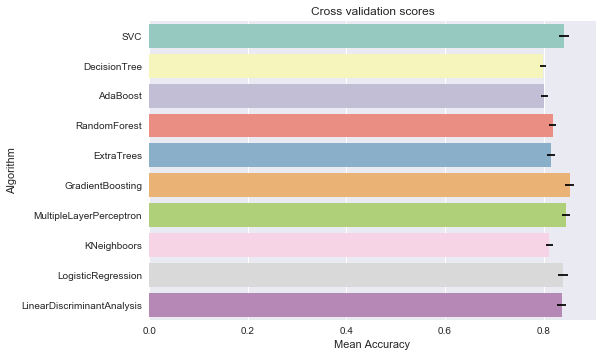

In [110]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
plt.show()

In [111]:
cv_res

,Algorithm,CrossValMeans,CrossValerrors
0,SVC,0.841193,0.010790
1,DecisionTree,0.798352,0.006339
2,AdaBoost,0.801648,0.007842
3,RandomForest,0.817955,0.007152
4,ExtraTrees,0.814489,0.007750
5,GradientBoosting,0.853125,0.009184
6,MultipleLayerPerceptron,0.845568,0.008079
7,KNeighboors,0.811307,0.006834
8,LogisticRegression,0.839261,0.010089
9,LinearDiscriminantAnalysis,0.836477,0.009259


In [112]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'n_estimators' : [100,500],
                'learning_rate': [0.1, 0.01],
                 'max_depth': [3,8],
                'max_features': [0.3, 0.1] 
                }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 1, verbose = 1)

gsGBC.fit(x_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 13.6min finished


0.85340909090909089

In [113]:
test=full.loc[199523:]

In [114]:
testy=test[['work_weeks','capital_gain','num_person_Worked_employer','worker_class1','stk_dividend'
,'Industry_code','Sex','edu1','capital_loss','household_summary','veterans_benefits','family_member_<18','age']]

In [115]:
test_y.shape

(59857L,)

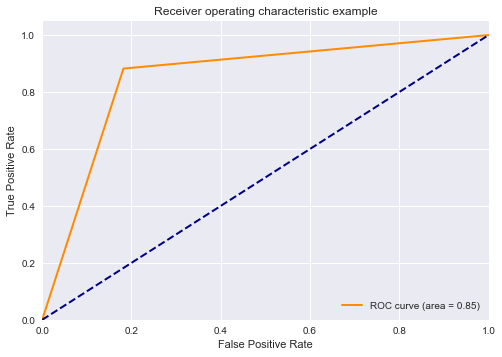

In [116]:
##...ROC CURVE

predii=GBC_best.predict(testy)
fpr,tpr,x=roc_curve(testyy,predii)
roc_auc=auc(fpr,tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()